# Total tweets = 72617 (using TWINT library)
# Time from 17th February to 19th February
# Hashtags = 12716
# Most frequently occurring 30 hashtags (With and without the `#IPLAuction2021`)
# Mentioned accounts = 5472
#Most mentioned 20 accounts 

In [1]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import re
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Store the tweets from txt file to json with all details and list data form
tweets_data = [] #the text data for further processing
tweets_text = [] #Array of json objects with all details
tweets_id=dict() #Hashmap to store tweet ids to prevent repetition
print("Parsing the text file")
#Text file has tweets
for filename in ['result1.txt','result2.txt','result3.txt','result4.txt','result5.txt']:
    print("Parsing the text file ",filename)
    with open(filename,'r') as file:
        number=0
        for line in file.read().split('\n'):
            field = line.split(' ')
            if field[0] in tweets_id:
                continue
            else:
                tweets_id[field[0]]=1
            tweets=dict()
            if len(field)<5:
                continue
            tweets['id']=field[0]
            tweets['date']=field[1]
            tweets['time']=field[2]
            temp=' '.join(field[4:])
            #temp=temp.replace(r'[a-zA-Z0-9]','')
            tweets['text']=temp
            tweets_text.append(temp)
            tweets_data.append(tweets)
            number+=1
        print(number," is the number of tweets in this file ")



print("The total number of Tweets extracted is:",len(tweets_data))


Parsing the text file
Parsing the text file  result1.txt
4985  is the number of tweets in this file 
Parsing the text file  result2.txt
7071  is the number of tweets in this file 
Parsing the text file  result3.txt
13447  is the number of tweets in this file 
Parsing the text file  result4.txt
4321  is the number of tweets in this file 
Parsing the text file  result5.txt
15823  is the number of tweets in this file 
The total number of Tweets extracted is: 45647


In [2]:
tweets_data[:40]

[{'date': '2021-02-19',
  'id': '1362551607813152772',
  'text': '<MSAalamOfficial> @azharflicks : Very disappointed not to see a single player from Hyderabad in the Hyderabad Sunrisers Team  #IPLAuction @SunRisers @IPL #SRH. #IPLAuctions2021 #Cricket #Active   @MSAalamOfficial #MSAalam.',
  'time': '05:26:32'},
 {'date': '2021-02-19',
  'id': '1362549392952094720',
  'text': "<oyegupta_> Smith was missing Jinks, so both are back again. DC themselves were surprised that they had him on the first bid they made. I'm just a little perplexed having both Rahane and Smith together and where will you play him? #IPLAuction2021 #DelhiCapitals #SteveSmith #ipl2021",
  'time': '05:17:44'},
 {'date': '2021-02-19',
  'id': '1362548198967898114',
  'text': '<TamilanNewz> #ChennaiSuperKings அணியில் #மொயின்அலி! #MoenAli #WhistlePodu #CSK #IPL2021 #IPLAuction #IPLAuction2021 #IPL  https://t.co/RPgVe3Uy01',
  'time': '05:13:00'},
 {'date': '2021-02-19',
  'id': '1362547947360034820',
  'text': '<Maha_Sp

[['#IPLAuction', '#SRH', '#IPLAuctions2021', '#Cricket', '#Active', '#MSAalam'], ['#IPLAuction2021', '#DelhiCapitals', '#SteveSmith', '#ipl2021'], ['#ChennaiSuperKings', '#MoenAli', '#WhistlePodu', '#CSK', '#IPL2021', '#IPLAuction', '#IPLAuction2021', '#IPL'], ['#IPL', '#IPLAuction', '#IPL2021', '#Cricket'], ['#Xbox', '#eBay', '#UnitedKingdom', '#Auction', '#Xboxthusiast'], ['#IPL2021Auctions', '#ChennaiSuperKings', '#pujara', '#MoeenAli', '#MumbaiIndians', '#RCB', '#KyleJamieson', '#DavidMalan', '#PunjabKings', '#IPL2021', '#India', '#ViratKohli', '#CSK', '#MSDhoni', '#BBL', '#Maxwell', '#DelhiCapitals', '#Drishyam2OnPrime', '#Dream11'], ['#or'], ['#Wave', '#OR'], ['#eBay', '#BarThingz', '#Auction', '#SALE', '#SouthernComfort', '#SupportLove', '#TeeShirt', '#Purple', '#Pride', '#Bartender', '#Womens', '#VNeck', '#BuyItNow', '#MakeOffer'], ['#nepotism', '#arjuntendulkar', '#arjuntendulkar', '#IPL2021Auction', '#IPL', '#MumbaiIndians', '#IPLAuction']]
['<MSAalamOfficial> @azharflicks : 

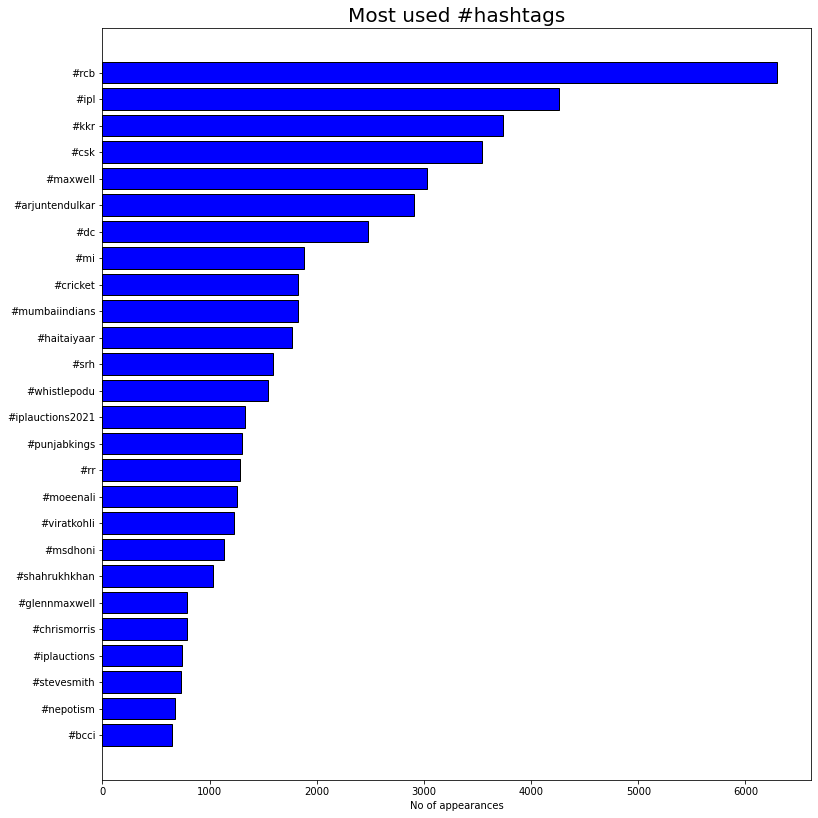

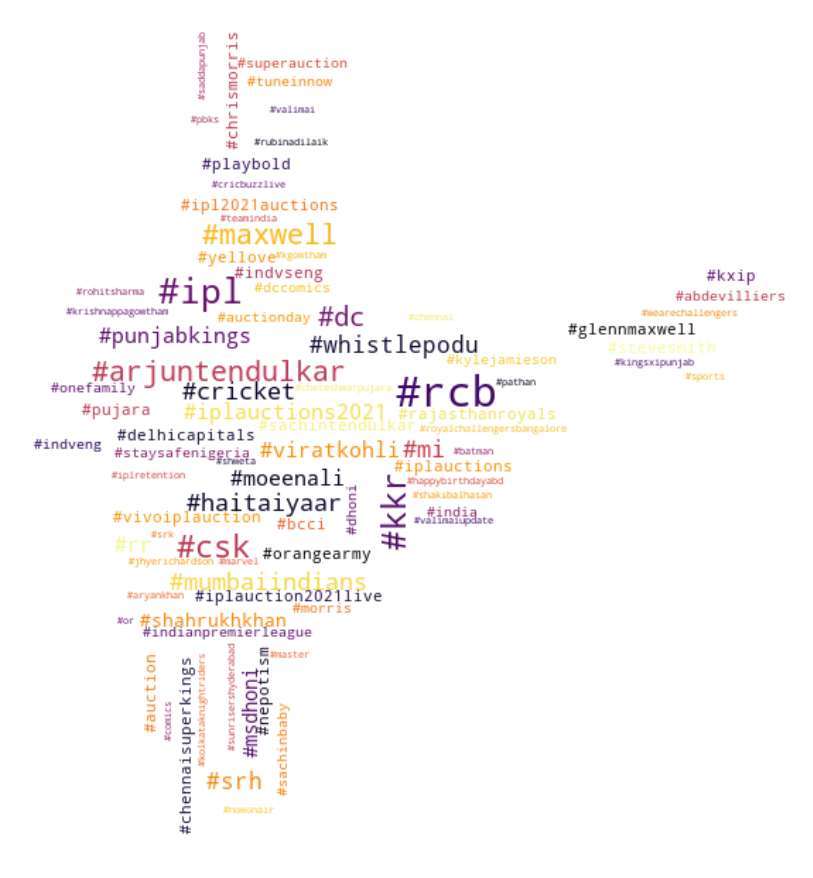

In [5]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z0-9]+")
hashtag_matches=[]
for text in tweets_text:
    hashtag_matches.append(hashtag_pattern.findall(text))
print(hashtag_matches[:10])
print(tweets_text[:10])

hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch.lower() not in hashtag_dict.keys():
            hashtag_dict[singlematch.lower()] = 1
        else:
            hashtag_dict[singlematch.lower()] = hashtag_dict[singlematch.lower()]+1


#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1]) ## sort based on count
hashtag_ordered_list = hashtag_ordered_list[::-1]  ## reverse it to get highest count first
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
print(len(hashtag_ordered_list))
##print(hashtag_ordered_list)
#Pick the 30 most used hashtags to plot
for item in hashtag_ordered_list[4:30]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])
    
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'blue', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("No of appearances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

#Make a wordcloud plot of the most used hashtags, for this we need a dictionary 
#where the keys are the words and the values are the number of appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[4:90]:#leave the top 4 just the IPLAuction related
    hashtag_ordered_dict[item[0]] = item[1]
#wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
mask = np.array(Image.open('india.jpeg'))
wordcloud = WordCloud(width=1000,height=1000,background_color="white",colormap="inferno",  max_font_size=30,min_font_size=5,mask=mask,
               random_state=77, max_words=200,contour_color='black').generate_from_frequencies(hashtag_ordered_dict)

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [6]:
print(hashtag_dict)
print(len(hashtag_dict))
print(hashtag_ordered_dict)
print(len(hashtag_ordered_dict))
print(hashtag_ordered_list[121:160])
print(len(hashtag_ordered_list))
print(hashtag_ordered_keys[:30])
print(len(hashtag_ordered_keys))

{'#iplauction': 11208, '#srh': 1589, '#iplauctions2021': 1330, '#cricket': 1830, '#active': 5, '#msaalam': 18, '#iplauction2021': 25696, '#delhicapitals': 644, '#stevesmith': 733, '#ipl2021': 11016, '#chennaisuperkings': 517, '#moenali': 36, '#whistlepodu': 1545, '#csk': 3541, '#ipl': 4263, '#xbox': 4, '#ebay': 26, '#unitedkingdom': 5, '#auction': 436, '#xboxthusiast': 1, '#ipl2021auctions': 551, '#pujara': 405, '#moeenali': 1261, '#mumbaiindians': 1822, '#rcb': 6298, '#kylejamieson': 274, '#davidmalan': 52, '#punjabkings': 1299, '#india': 228, '#viratkohli': 1232, '#msdhoni': 1134, '#bbl': 17, '#maxwell': 3030, '#drishyam2onprime': 10, '#dream11': 33, '#or': 191, '#wave': 3, '#barthingz': 1, '#sale': 21, '#southerncomfort': 1, '#supportlove': 1, '#teeshirt': 1, '#purple': 1, '#pride': 1, '#bartender': 1, '#womens': 1, '#vneck': 1, '#buyitnow': 2, '#makeoffer': 1, '#nepotism': 681, '#arjuntendulkar': 2912, '#ipl2021auction': 7780, '#tamil': 28, '#tamilnadu': 40, '#breaking': 61, '#yell

4719


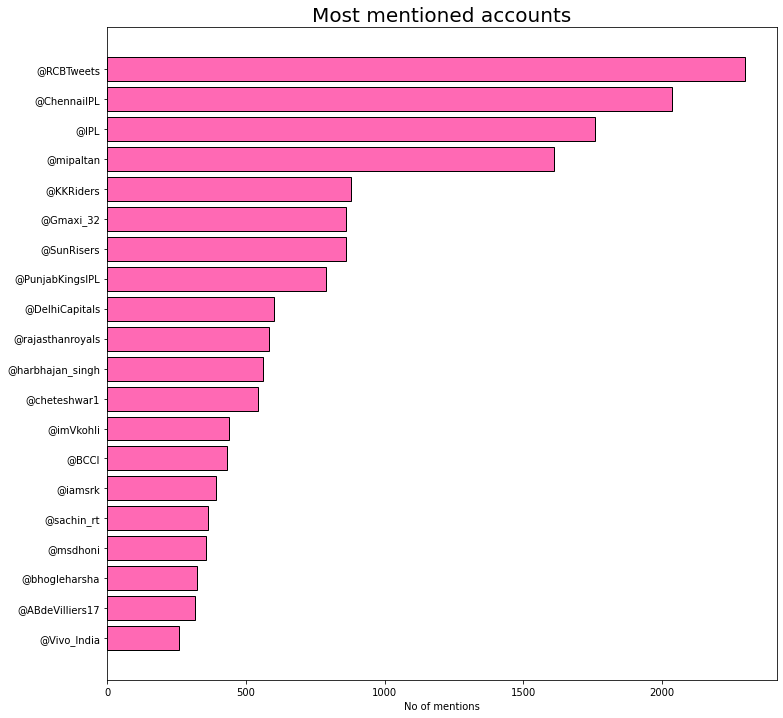

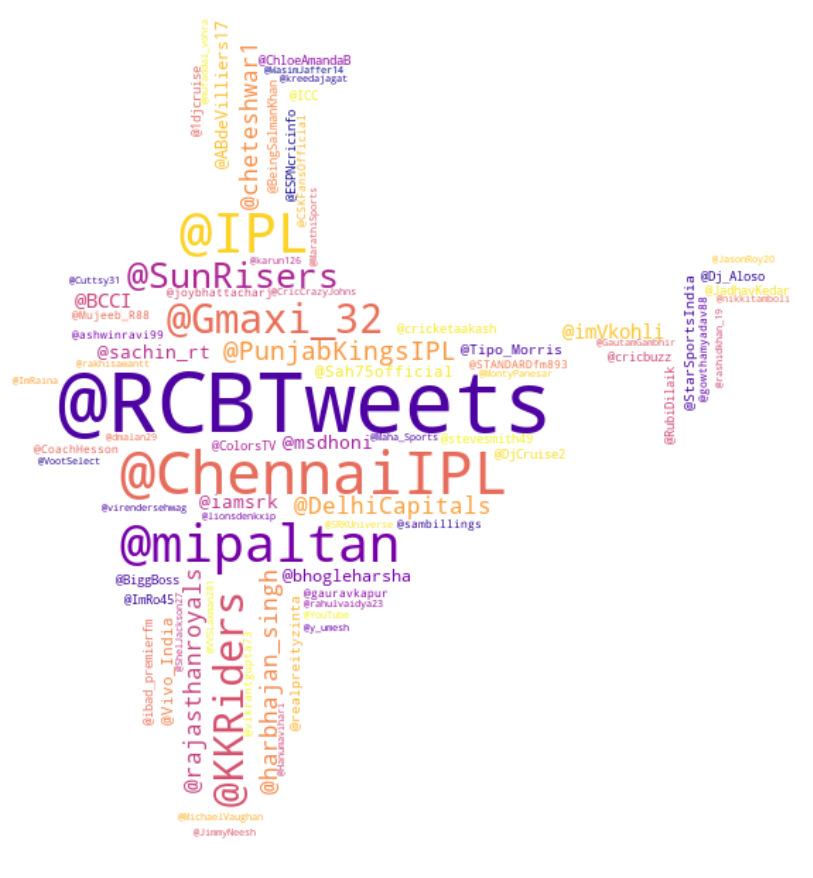

In [7]:

#Similarly for mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_0-9]+")
mention_matches=[]
for text in tweets_text:
    mention_matches.append(mention_pattern.findall(text))

mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1



#Create an ordered list of tuples with the most mentioned users and
#the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
##print(mentions_ordered_list[0],mentions_ordered_list[-1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous
#list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
print(len(mentions_ordered_list))
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])


fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'hotpink', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("No of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)
plt.show()

#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[:]:
    mentions_ordered_dict[item[0]] = item[1]
##wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
mask = np.array(Image.open('india.jpeg'))
wordcloud = WordCloud(width=1000,height=1000,background_color="white",colormap="plasma", max_words=90, mask=mask,
               max_font_size=80,min_font_size=6, random_state=3, contour_color='black').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [8]:
print(len(mentions_ordered_dict))
print(len(mentions_dict))
print(len(mentions_ordered_list))
print(len(mentions_ordered_keys))

print(mentions_ordered_dict)
print(mentions_ordered_list[:30])
print(mentions_dict)


4719
4719
4719
20
{'@RCBTweets': 2299, '@ChennaiIPL': 2035, '@IPL': 1758, '@mipaltan': 1610, '@KKRiders': 880, '@Gmaxi_32': 860, '@SunRisers': 860, '@PunjabKingsIPL': 788, '@DelhiCapitals': 603, '@rajasthanroyals': 585, '@harbhajan_singh': 562, '@cheteshwar1': 542, '@imVkohli': 439, '@BCCI': 431, '@iamsrk': 393, '@sachin_rt': 364, '@msdhoni': 356, '@bhogleharsha': 325, '@ABdeVilliers17': 315, '@Vivo_India': 260, '@Sah75official': 245, '@StarSportsIndia': 200, '@realpreityzinta': 197, '@Tipo_Morris': 188, '@stevesmith49': 160, '@ImRo45': 152, '@ChloeAmandaB': 151, '@Dj_Aloso': 140, '@BeingSalmanKhan': 140, '@cricbuzz': 138, '@ESPNcricinfo': 136, '@JadhavKedar': 123, '@1djcruise': 122, '@ICC': 122, '@cricketaakash': 119, '@ColorsTV': 118, '@ibad_premierfm': 115, '@BiggBoss': 114, '@RubiDilaik': 113, '@DjCruise2': 107, '@joybhattacharj': 107, '@vikrantgupta73': 104, '@CoachHesson': 101, '@Mujeeb_R88': 100, '@STANDARDfm893': 96, '@gauravkapur': 95, '@sambillings': 84, '@ashwinravi99': 82, 

In [19]:
tracklist=[i[0] for i in hashtag_ordered_list[4:120]]
tracks=['#warner', '#kanewilliamson', '#mipaltan', '#smith', '#davidmalan', '#ashwin', '#joeroot','#davidwarner', 
        '#umeshyadav', '#preityzinta', '#punjab','#malan', '#jamieson','#rashidkhan', '#fafduplesis']
tracklist.extend(tracks)
stopwords=['#ipl','#iplauctions','#iplauction2021live',
           '#ipl2021auctions','#shweta','#master','#dccomics',
           '#staysafenigeria','#nowonair','#thursdaymorning','#rt',
           '#like','#follow','#iplauctionlive','#or','#comics',
           '#petrol100','#art','#musicstillmatters','#nonstopmusic','#batman',
           '#marvel','#hallabol','#save','#vivoiplauction','#tuneinnow',
           '#nowplaying','#auction2021','#cricbuzzlive','#wearechallengers',
           '#psl6','#yehhainayidilli','#haitaiyaar','#cooljamz','#np','#morningdriveshowib', '#bbtrendmasterrubinadilaik']

for word in stopwords:
  if word in tracklist:
      tracklist.remove(word)

# for i in range(len(tracklist)):
#   print(tracklist[i])
N=len(tracklist)
print(N)
matrix=np.zeros(shape=(N,N),dtype=np.uint8)

for i in range(N):
  for j in range(N):
    if i==j:
      continue
    for match in hashtag_matches:
      if tracklist[i] in match and tracklist[j] in match:
        matrix[i,j]+=1






98


In [ ]:
# newlist=[hashtag_ordered_list[i][0] for i in range(6000,10000)]
# words=['#saddapunjab','#laxman','#vizag','#rashidkhan','#brathwaite','#warner',
#        '#davidwarner','#risewithus','#williamson','#captainkane','#kanewilliamson',
#        '#davidwarner31','#mipaltan','#umeshyadav','#smith','#malan','#davidmalan','#preityzinta',
#        '#fafduplesis','#ashwin','#punjab','#joeroot','#jamieson']
# tracks=[]
# for w in words:
#   print(w,w in newlist,w in tracklist)
#   if w in newlist and w in tracklist:
#     words.remove(w)
#   if w in newlist and w not in tracklist:
#     tracks.append(w)
#     words.remove(w)
# print(words)
# print(tracks)

In [20]:
for i in range(N):
  for j in range(N):
    if matrix[i,j]>50:
      print(tracklist[i],tracklist[j])

print(matrix)

#rcb #csk
#rcb #mi
#rcb #mumbaiindians
#rcb #rajasthanroyals
#rcb #auction
#kkr #csk
#csk #rcb
#csk #kkr
#csk #mi
#csk #mumbaiindians
#csk #rajasthanroyals
#csk #auction
#csk #dhoni
#dc #comicbooks
#mi #rcb
#mi #csk
#cricket #viratkohli
#mumbaiindians #rcb
#mumbaiindians #csk
#mumbaiindians #rajasthanroyals
#mumbaiindians #auction
#viratkohli #cricket
#viratkohli #rohitsharma
#rajasthanroyals #rcb
#rajasthanroyals #csk
#rajasthanroyals #mumbaiindians
#rajasthanroyals #auction
#auction #rcb
#auction #csk
#auction #mumbaiindians
#auction #rajasthanroyals
#dhoni #csk
#rohitsharma #viratkohli
#comicbooks #dc
[[  0  29 209 ...   3   0   0]
 [ 29   0  61 ...   1   0   0]
 [209  61   0 ...   1   0   1]
 ...
 [  3   1   1 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


In [21]:
#networkx graph
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
G = nx.from_numpy_matrix(matrix,parallel_edges=True)
partition = community_louvain.best_partition(G)
print(partition.keys())
print(len(set(partition.values())))
for i in range(len(set(partition.values()))):
  print()
  print("SET :",i+1)
  
  for j in range(N):
    if partition[j]==i:
      print(tracklist[j])

for node in partition:
    G.nodes[node]["cluster"] = partition[node]
for node in range(N):
    G.nodes[node]["name"]=tracklist[node]
    # print(tracklist[node])
# save file
nx.write_gml(G, "/content/graphClustered.gml")


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])
5

SET : 1
#maxwell
#glennmaxwell
#stevesmith
#delhicapitals
#orangearmy
#playbold
#morris
#onefamily
#auctionday
#royalchallengersbangalore
#saddapunjab
#happybirthdayabdevilliers
#unsold
#delhi
#trendingnow
#smith
#umeshyadav
#jamieson

SET : 2
#kkr
#dc
#mi
#srh
#punjabkings
#rr
#shahrukhkhan
#kxip
#valimai
#pathan
#shakibalhasan
#sunrisershyderabad
#kingsxipunjab
#srk
#kolkataknightriders
#aryankhan
#valimaiupdate
#chennai
#salmankhan
#comicbooks
#warner
#davidwarner
#preityzinta

SET : 3
#rcb
#csk
#mumbaiindians
#whistlepodu
#iplauctions2021
#moeenali
#chrismorris
#rajasthanroyals
#yellove
#chen

In [ ]:
#Hashtags in other hashtags

# for i in range(1000):
#   for j in range(1000):
#     if i!=j and hashtag_ordered_list[i][0][1:] in hashtag_ordered_list[j][0][1:] and len(hashtag_ordered_list[i][0])>=5: 
#       print(hashtag_ordered_list[i][0],hashtag_ordered_list[j][0])